## Malaria Cell Images
[Data set source](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria?resource=download)

### Data loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/PROJECTS/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
import glob
Parasitized = glob.glob("/content/cell_images/Parasitized/*")
Uninfected = glob.glob("/content/cell_images/Uninfected/*")

In [ ]:
import pandas as pd
data = {
    'Path': Parasitized + Uninfected,
    'Class': ['Parasitized'] * len(Parasitized) + ['Uninfected'] * len(Uninfected)
}

df = pd.DataFrame(data)
df.head()

,Path,Class
0,/content/cell_images/Parasitized/C68P29N_ThinF...,Parasitized
1,/content/cell_images/Parasitized/C176P137NThin...,Parasitized
2,/content/cell_images/Parasitized/C91P52ThinF_I...,Parasitized
3,/content/cell_images/Parasitized/C137P98ThinF_...,Parasitized
4,/content/cell_images/Parasitized/C132P93ThinF_...,Parasitized


### EDA

In [ ]:
df.describe()

,Path,Class
count,27560,27560
unique,27560,2
top,/content/cell_images/Parasitized/C68P29N_ThinF...,Parasitized
freq,1,13780


<Axes: >

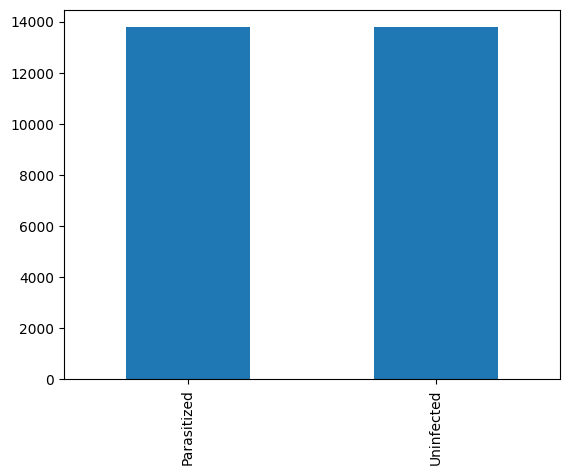

In [ ]:
df['Class'].value_counts(sort=True).plot(kind='bar')

In [ ]:
df['Class'].value_counts(sort=True)

Parasitized    13780
Uninfected     13780
Name: Class, dtype: int64

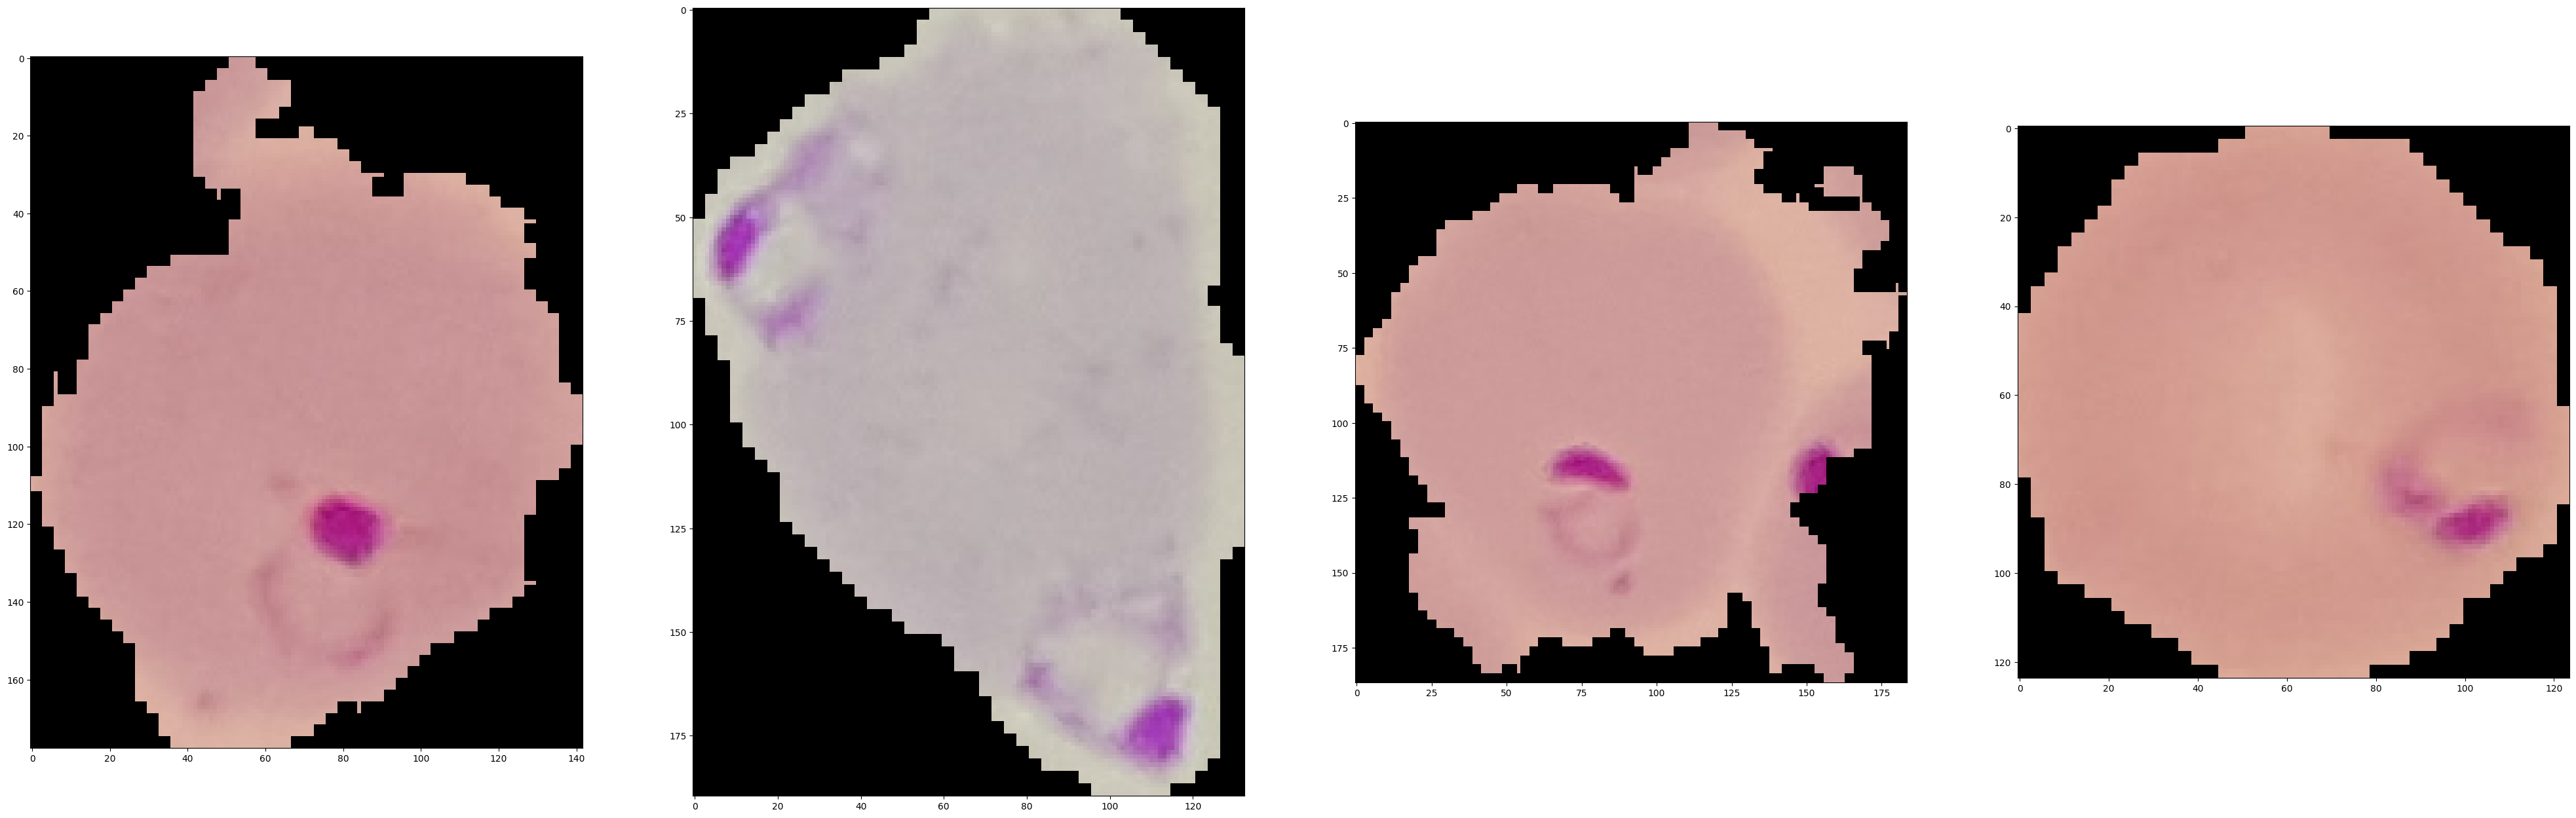

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f, axarr = plt.subplots(1,4,figsize=(50,50))
axarr[0].imshow(mpimg.imread(Parasitized[0]))
axarr[1].imshow(mpimg.imread(Parasitized[1]))
axarr[2].imshow(mpimg.imread(Parasitized[2]))
axarr[3].imshow(mpimg.imread(Parasitized[3]))

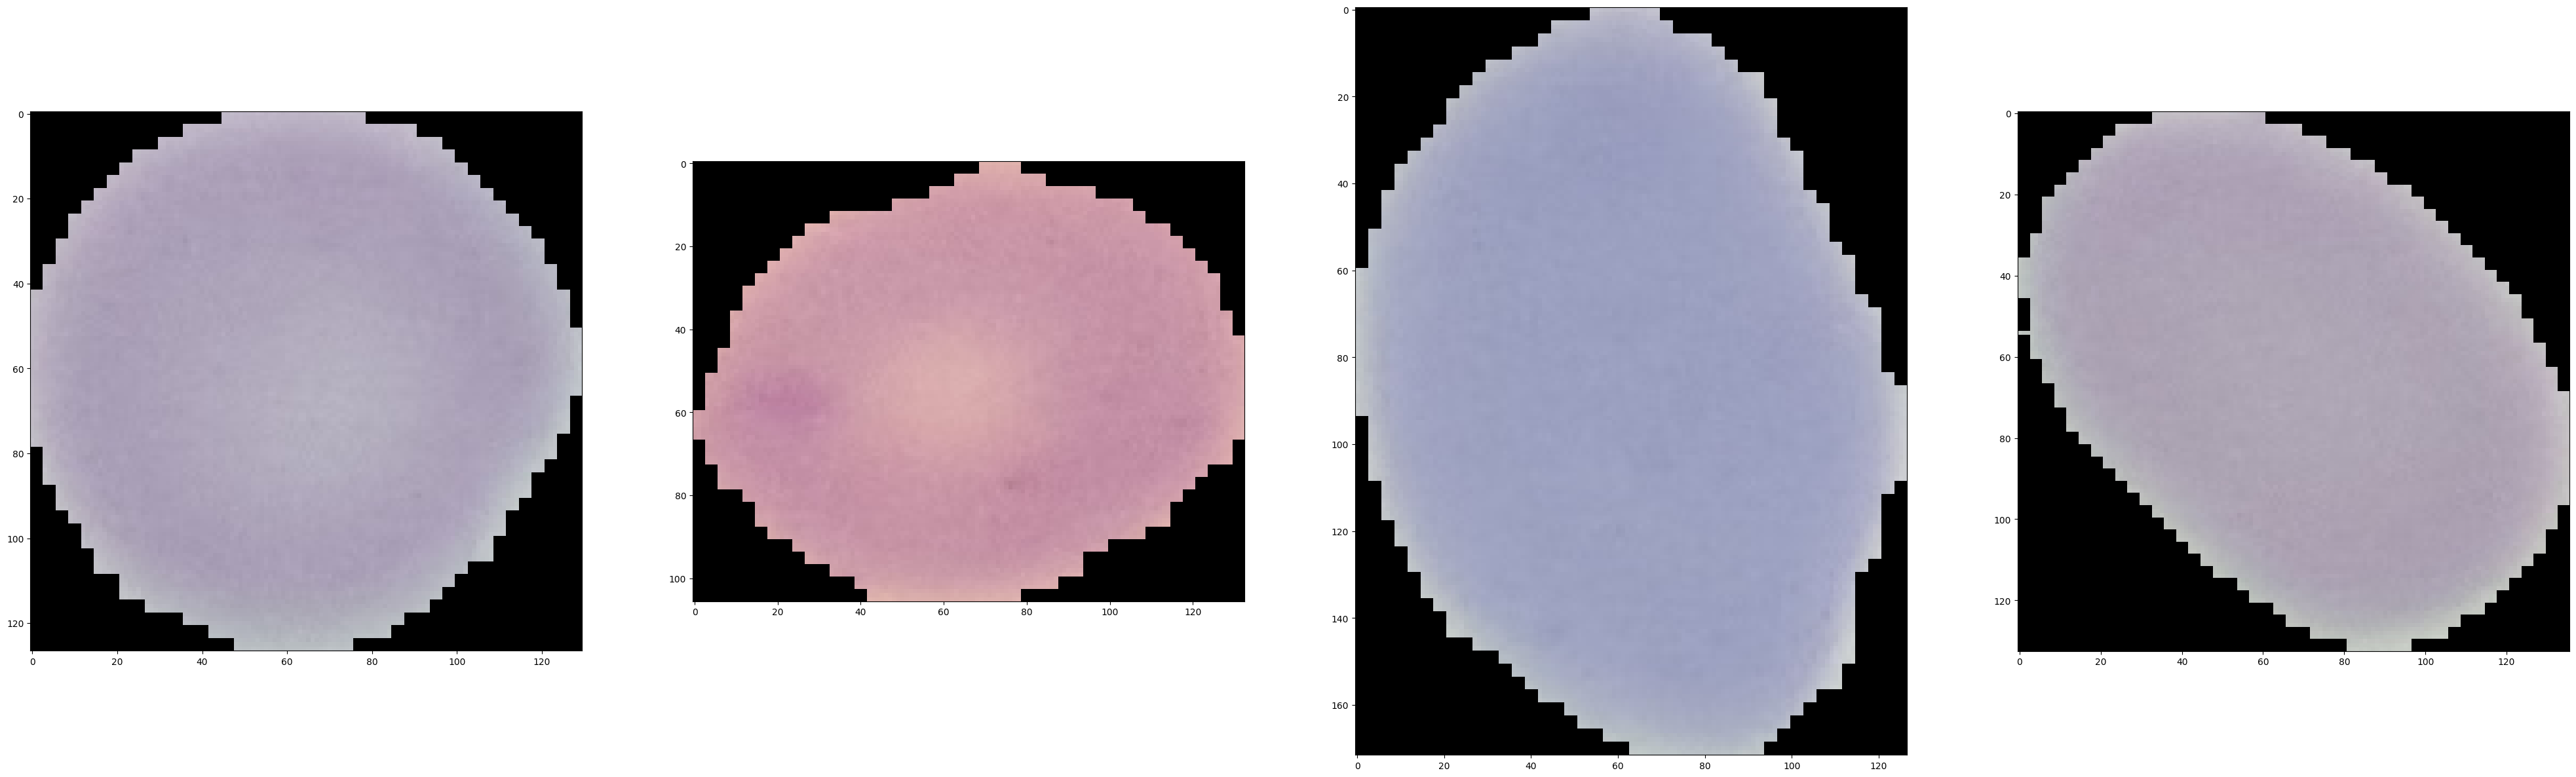

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f, axarr = plt.subplots(1,4,figsize=(50,50))
axarr[0].imshow(mpimg.imread(Uninfected[0]))
axarr[1].imshow(mpimg.imread(Uninfected[1]))
axarr[2].imshow(mpimg.imread(Uninfected[2]))
axarr[3].imshow(mpimg.imread(Uninfected[3]))

### train and test split

In [ ]:
df = df[df['Path'].str.endswith('.png')]

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Uninfected     10371
Parasitized    10297
Name: Class, dtype: int64


<Axes: >

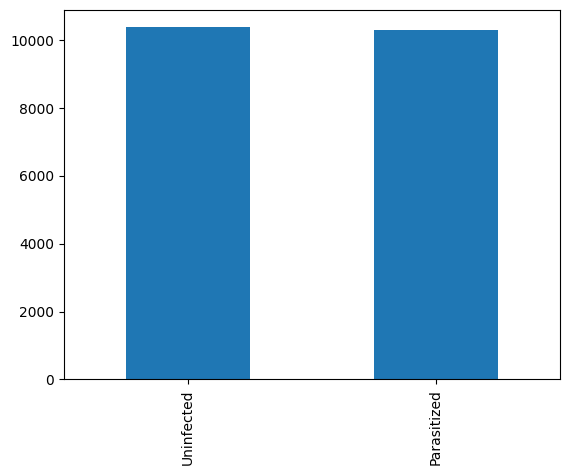

In [ ]:
print(train['Class'].value_counts())
train['Class'].value_counts().plot.bar()

Parasitized    3482
Uninfected     3408
Name: Class, dtype: int64


<Axes: >

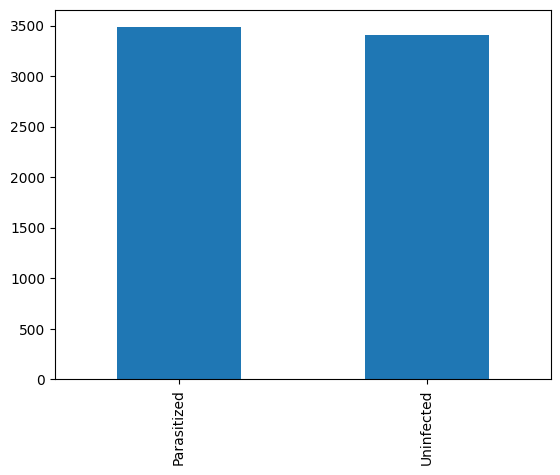

In [ ]:
print(test['Class'].value_counts())
test['Class'].value_counts().plot.bar()

### Data Pre-Processing

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_dataframe(
    train,
    "",
    x_col='Path',
    y_col='Class',
    target_size=(75,75),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 20668 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    test,
    "",
    x_col='Path',
    y_col='Class',
    target_size=(75,75),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 6890 validated image filenames belonging to 2 classes.


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 15.3 MB/s eta 0:00:00


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D,Dropout,BatchNormalization
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.90, patience=2, verbose=1, mode='auto')
callbackList = [ReduceLR]

### Modeling

#### BaseLine1 Model

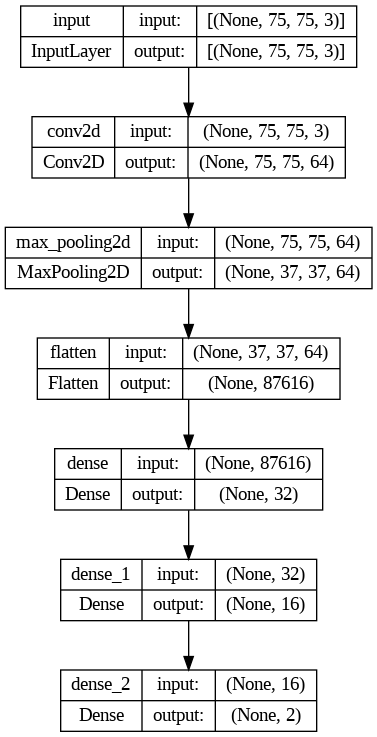

In [ ]:
tf.keras.backend.clear_session()
input = Input(shape=(75, 75, 3), name="input")

conv1 = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=32))(input)
MP1 = MaxPooling2D(pool_size=(2, 2))(conv1)
F1 = Flatten()(MP1)
dense1 = Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=32))(F1)
dense2 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=32))(dense1)
output = Dense(2, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_uniform())(dense2)

model1 = Model(inputs=input, outputs=output)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=1e-2 / 15)
model1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", "AUC"], run_eagerly=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
tf.keras.utils.plot_model(model1, "model1.png", show_shapes=True)

In [ ]:
rm -rf ./logs/

In [ ]:
history = model1.fit(
    train_generator,
    epochs=10,
    batch_size=126,
    callbacks=callbackList,
    validation_data=validation_generator
)

Epoch 1/10
646/646 [==============================] - 70s 96ms/step - loss: 0.6707 - accuracy: 0.6507 - auc: 0.7026 - val_loss: 0.5733 - val_accuracy: 0.7083 - val_auc: 0.7763 - lr: 0.0010
Epoch 2/10
646/646 [==============================] - 62s 96ms/step - loss: 0.5474 - accuracy: 0.7302 - auc: 0.7987 - val_loss: 0.5268 - val_accuracy: 0.7505 - val_auc: 0.8215 - lr: 0.0010
Epoch 3/10
646/646 [==============================] - 54s 83ms/step - loss: 0.4695 - accuracy: 0.7846 - auc: 0.8621 - val_loss: 0.4784 - val_accuracy: 0.7711 - val_auc: 0.8532 - lr: 0.0010
Epoch 4/10
646/646 [==============================] - 56s 87ms/step - loss: 0.3864 - accuracy: 0.8308 - auc: 0.9117 - val_loss: 0.4906 - val_accuracy: 0.7775 - val_auc: 0.8489 - lr: 0.0010
Epoch 5/10
646/646 [==============================] - 53s 82ms/step - loss: 0.3041 - accuracy: 0.8718 - auc: 0.9480 - val_loss: 0.3932 - val_accuracy: 0.8248 - val_auc: 0.9050 - lr: 0.0010
Epoch 6/10
646/646 [==============================] - 5

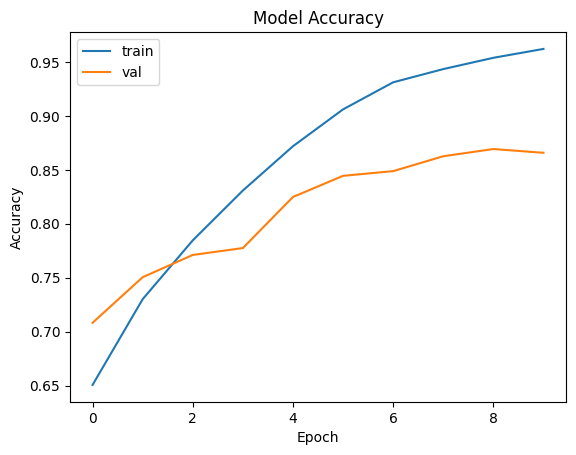

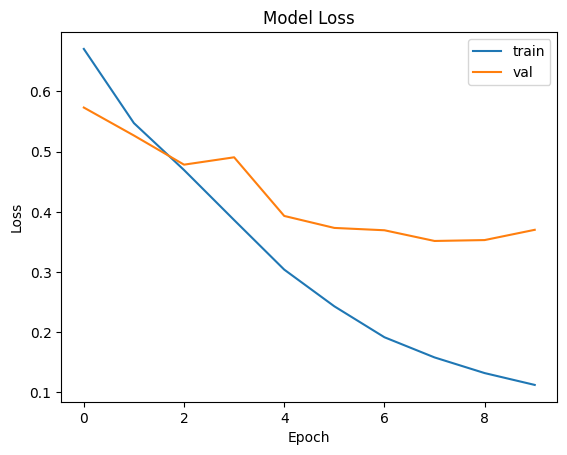

In [ ]:
import matplotlib.pyplot as plt


# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## BaseLine Model 2